In [20]:
import math, random
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [21]:
class Normal():
    def __init__(self, mean, sd ):
        self.mean = mean
        self.sd = sd

    # z-score 轉換
    def Z_score(self, x):
        z = ( x - self.mean ) / self.sd
        return round( z, 2 )

    # 計算常態分布
    def calculate(self, z):
        y = ( 1 / ( math.sqrt( 2 * math.pi ) ) ) * np.exp( -(z)**2 / 2 )
        return y

    # 得到範圍機率
    def Prob(self, x_low, x_high ):
        z_low = self.Z_score(x_low)
        z_high = self.Z_score(x_high)
        np.linspace(z_low, z_high)
        z = sp.symbols('z')
        prob = sp.integrate( ( 1 / ( sp.sqrt( 2 * sp.pi ) ) ) * sp.exp( -(z)**2 / 2 ) , (z, z_low, z_high ) ).evalf()
        return round(prob, 4)


    # 印出特定範圍分布和機率
    def plot_Prob(self, x_low, x_high ):
        prob = self.Prob(x_low, x_high)
        print(f"P( {x_low} < x < {x_high} ) : {prob}")
        self.plot_normal(x_low, x_high)


    # 印出分布函數
    def plot_normal(self, x_low = None , x_high = None ):
        z = np.linspace( -4, 4, num=100)
        y = self.calculate(z)
        ax1 = plt.subplot(111)
        ax1.fill_between(z,y,alpha=0.7, color='skyblue')

        # 如果要印出特定區域
        if (x_low != None) and (x_high != None):
            z_low = self.Z_score(x_low)
            z_high = self.Z_score(x_high)
            z_p = np.linspace( z_low, z_high, num=100)
            y_p = self.calculate(z_p)
            ax1.fill_between(z_p, y_p, alpha=0.7, color='orangered')

        ax1.set_xlabel("Z-score")
        ax1.set_ylabel("prod")
        ax1.plot(z,y)
        plt.show()


## 使用類別方法
### 1.定義類別 : data = Normal( 平均, 標準差 )
### 2.函數 : Prob( 下限, 上限 ) 會得到範圍內機率
### 3.函數 : plot_normal() 會印出常態分布曲線
### 4.函數 : plot_Prob( 下限, 上限 ) 會印出範圍的分布
### 5.函數 : Z_score(X) 可得到 X 的 z 分數

P( 1 < x < 3 ) : 0.1573


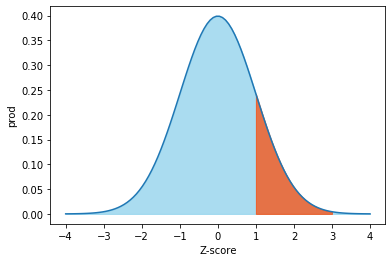

In [22]:
data = Normal(0,1)
data.plot_Prob(1,3)


-1.44
1.44
P( 260 < x < 390 ) : 0.8501


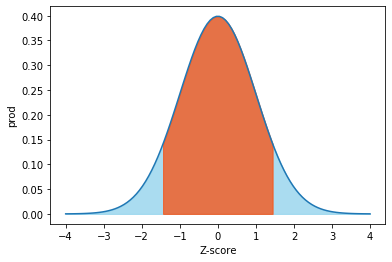

In [23]:
# Ex4g
data = Normal( 325, 45 )
print(data.Z_score(260))
print(data.Z_score(390))
data.plot_Prob( 260, 390 )

In [24]:
z = sp.symbols('z')
prob = sp.integrate( ( 1 / ( sp.sqrt( 2 * sp.pi ) ) ) * sp.exp( -(z)**2 / 2 ) , (z, 0, 1.51 ) ).evalf()
print(round(prob,4))

0.4345
